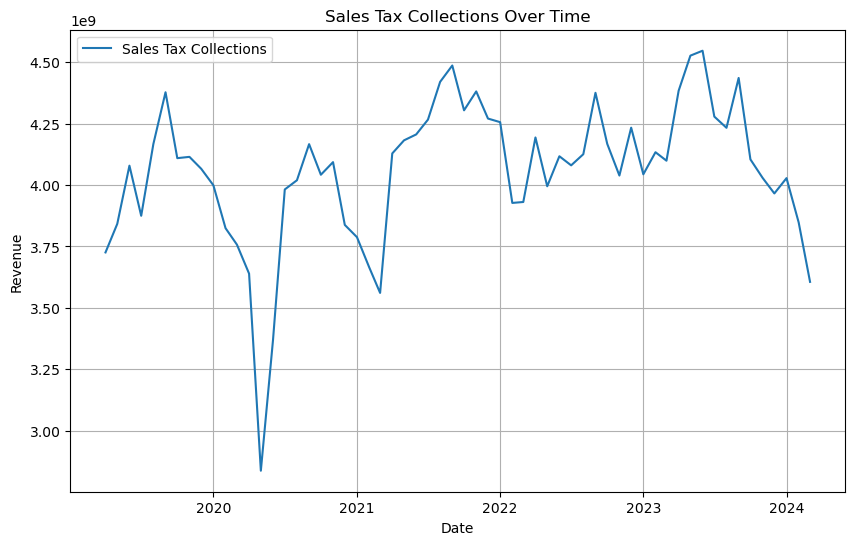

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = r'C:\Users\meman\Downloads\Sales_Tax_Collections_by_State.csv'
df = pd.read_csv(file_path)

# Create a Date column by combining month and year
df['Date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['numeric month'].astype(str) + '-01')

# Aggregate data by Date
df_aggregated = df.groupby('Date').agg({'value': 'sum'}).reset_index()

# Set the Date as the index
df_aggregated.set_index('Date', inplace=True)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df_aggregated.index, df_aggregated['value'], label='Sales Tax Collections')
plt.title('Sales Tax Collections Over Time')
plt.ylabel('Revenue')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.show()


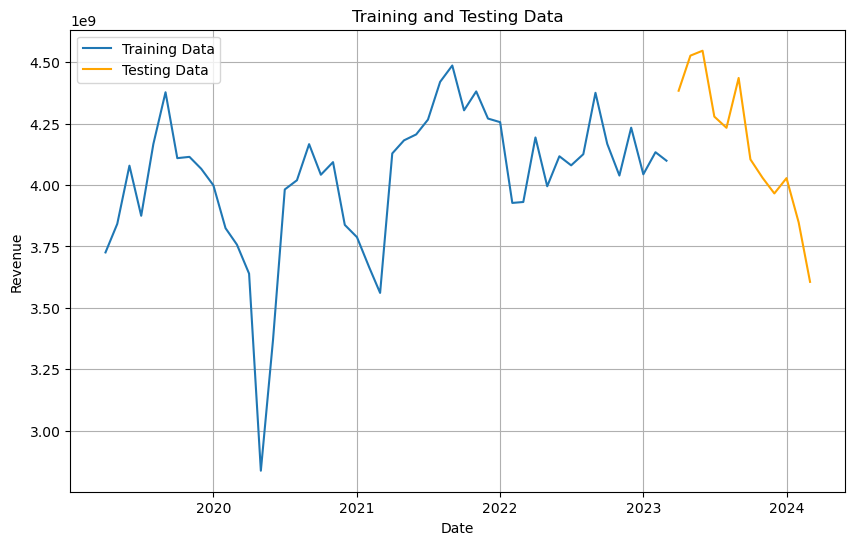

In [2]:
# Split the data into training and testing sets
train = df_aggregated.iloc[:-12]  # Use all data except the last 12 months for training
test = df_aggregated.iloc[-12:]  # Use the last 12 months for testing

# Plot training and testing data
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['value'], label='Training Data')
plt.plot(test.index, test['value'], label='Testing Data', color='orange')
plt.title('Training and Testing Data')
plt.ylabel('Revenue')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.show()


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=1988.368, Time=0.93 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=2009.995, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1986.577, Time=0.11 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1990.877, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2261.631, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1985.017, Time=0.03 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=1986.557, Time=0.07 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=1988.538, Time=0.53 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=1986.629, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=1986.720, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=1989.694, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=1988.650, Time=0.16 sec
 ARIMA(1,0,0)(0,0,0)[12]             : AIC=inf, Time=0.06 sec

Best model:  ARIMA(1,0,0)(0,0,0)[12] intercept
Total fit time: 2.212 seconds


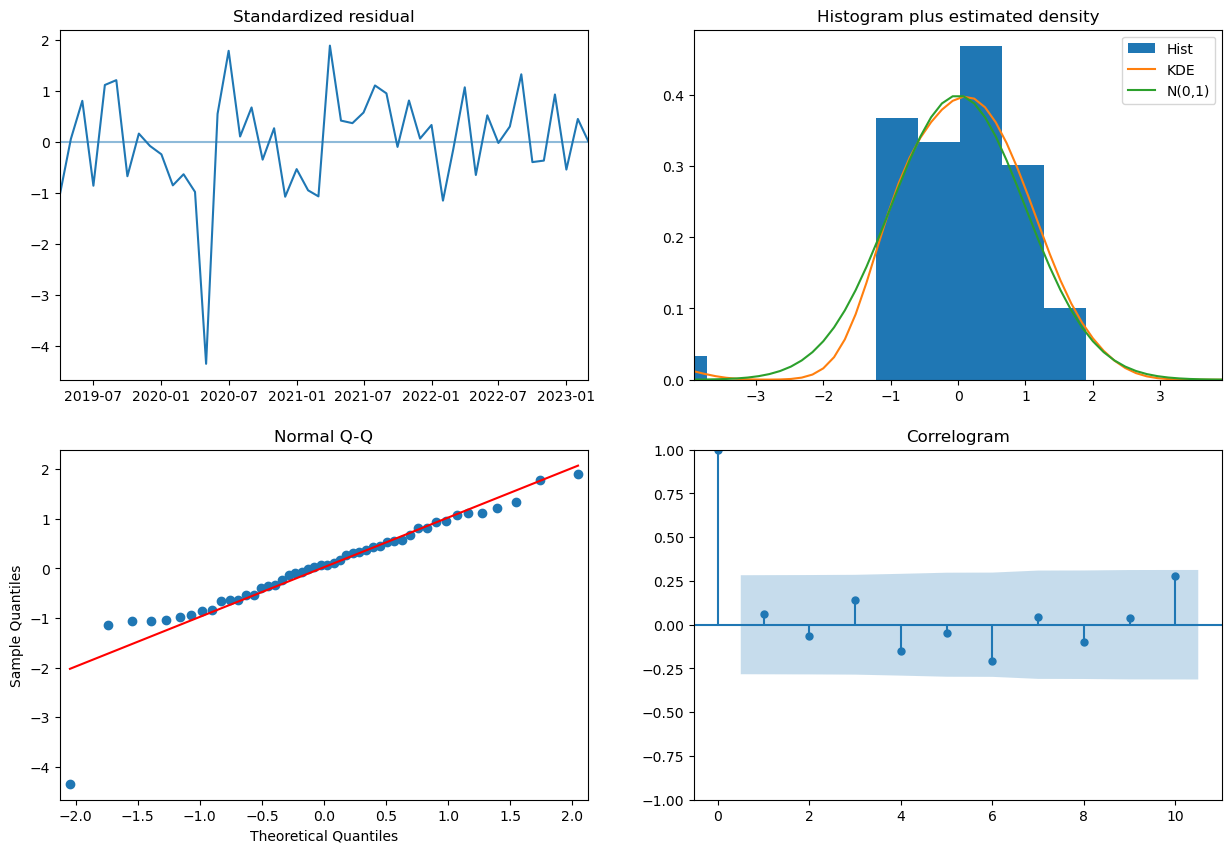

In [3]:
from pmdarima import auto_arima

# Fit the auto ARIMA model
model = auto_arima(train['value'], seasonal=True, m=12, trace=True, error_action='ignore', suppress_warnings=True)

# Plot model diagnostics
model.plot_diagnostics(figsize=(15, 10))
plt.show()


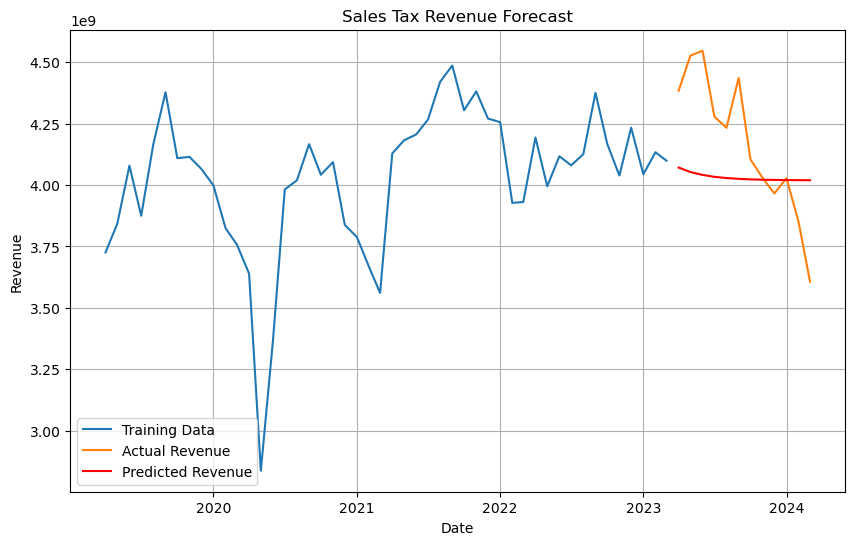

Mean Squared Error: 8.838306816258245e+16


In [4]:
from sklearn.metrics import mean_squared_error

# Make predictions
predictions = model.predict(n_periods=12)
predicted_mean = pd.Series(predictions, index=test.index)

# Plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['value'], label='Training Data')
plt.plot(test.index, test['value'], label='Actual Revenue')
plt.plot(predicted_mean.index, predicted_mean, label='Predicted Revenue', color='red')
plt.title('Sales Tax Revenue Forecast')
plt.ylabel('Revenue')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.show()

# Calculate the mean squared error
mse = mean_squared_error(test['value'], predicted_mean)
print(f'Mean Squared Error: {mse}')


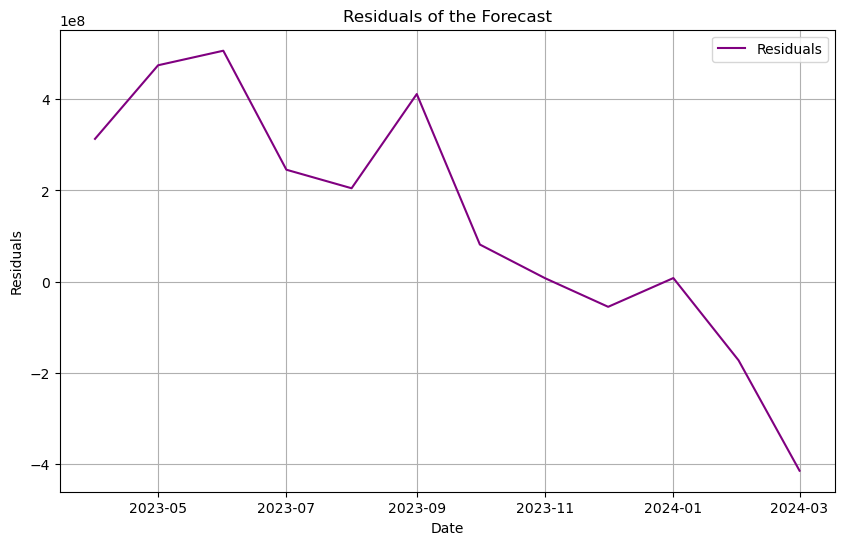

In [5]:
# Get residuals
residuals = test['value'] - predicted_mean

# Plot residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals.index, residuals, label='Residuals', color='purple')
plt.title('Residuals of the Forecast')
plt.ylabel('Residuals')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.show()


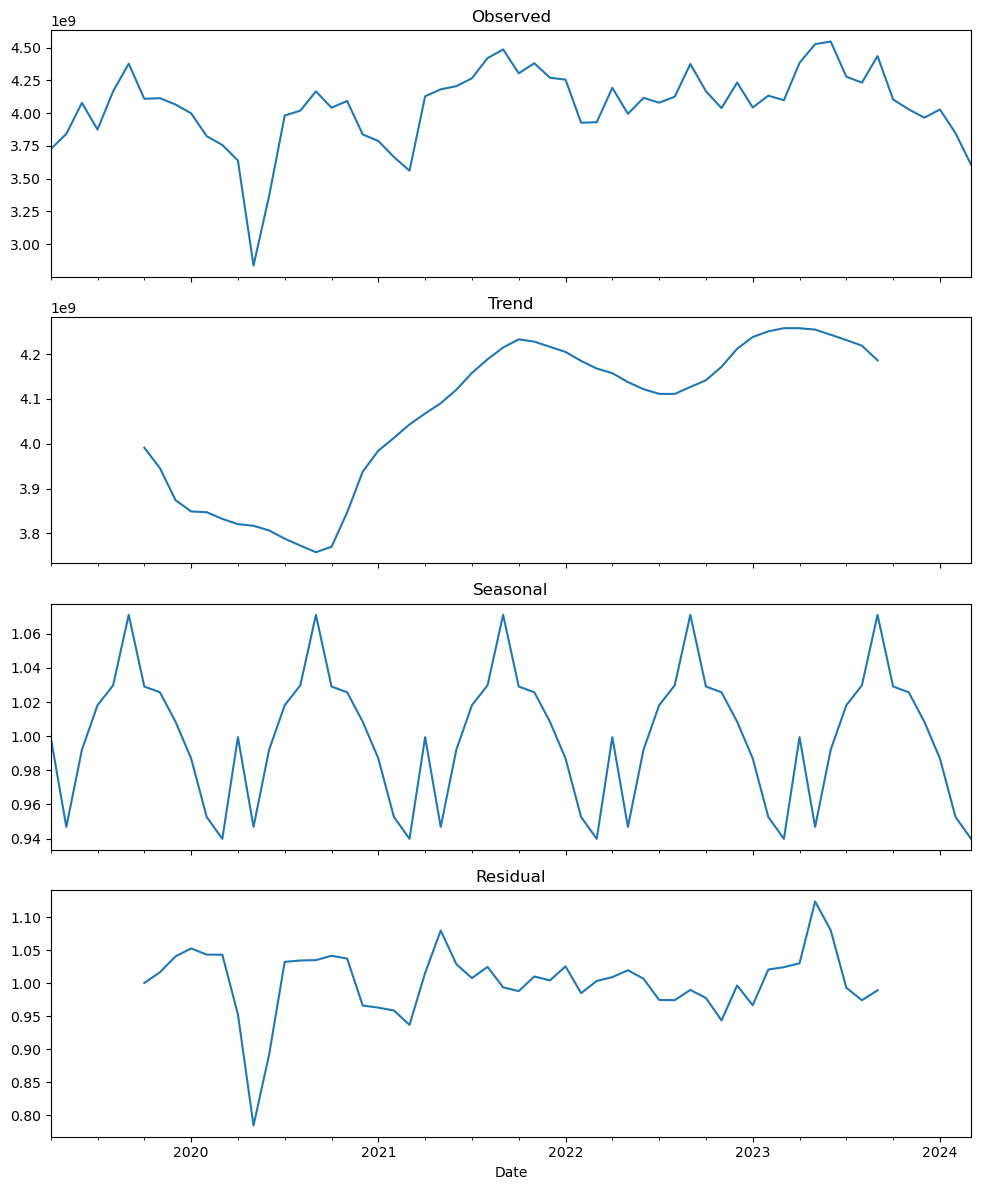

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(df_aggregated['value'], model='multiplicative', period=12)

# Plot the decomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 12), sharex=True)
decomposition.observed.plot(ax=ax1, title='Observed')
decomposition.trend.plot(ax=ax2, title='Trend')
decomposition.seasonal.plot(ax=ax3, title='Seasonal')
decomposition.resid.plot(ax=ax4, title='Residual')
plt.xlabel('Date')
plt.tight_layout()
plt.show()
